# Week 2 Tasks — Data Preparation, EDA, and Intro Modeling (Python)

Use this template to complete Week 2 tasks. Replace placeholders with your work. Ensure the notebook runs top-to-bottom without errors. Add short captions/annotations below each plot and metric output.


In [29]:
# Setup
import sys, warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, mean_squared_error, r2_score

sns.set_theme(style='whitegrid')
%matplotlib inline


## Task 1 — Load Data and Inspect


In [30]:
# TODO: Set path and read your dataset
# Example:
df = pd.read_csv('ncr_ride_bookings.csv', parse_dates=['Date'])
df.head(10)



,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,NaN,NaN,NaN,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,NaN,NaN,NaN,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,NaN,NaN,NaN,NaN,NaN,416.0,34.02,4.6,5.0,UPI
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,NaN,NaN,NaN,NaN,NaN,737.0,48.21,4.1,4.3,UPI
5,2024-02-06,09:44:56,"""CNR4096693""",Completed,"""CID4670564""",Auto,AIIMS,Narsinghpur,5.1,18.1,...,NaN,NaN,NaN,NaN,NaN,316.0,4.85,4.1,4.6,UPI
6,2024-06-17,15:45:58,"""CNR2002539""",Completed,"""CID6800553""",Go Mini,Vaishali,Punjabi Bagh,7.1,20.4,...,NaN,NaN,NaN,NaN,NaN,640.0,41.24,4.0,4.1,UPI
7,2024-03-19,17:37:37,"""CNR6568000""",Completed,"""CID8610436""",Auto,Mayur Vihar,Cyber Hub,12.1,16.5,...,NaN,NaN,NaN,NaN,NaN,136.0,6.56,4.4,4.2,UPI
8,2024-09-14,12:49:09,"""CNR4510807""",No Driver Found,"""CID7873618""",Go Sedan,Noida Sector 62,Noida Sector 18,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2024-12-16,19:06:48,"""CNR7721892""",Incomplete,"""CID5214275""",Auto,Rohini,Adarsh Nagar,6.1,26.0,...,NaN,NaN,NaN,1.0,Other Issue,135.0,10.36,NaN,NaN,Cash


Briefly describe the dataset, its purpose, and key variables.


## Task 2 — Data Types, Summary Stats, and Missingness


In [31]:
# Column dtypes and corrections if needed
df.dtypes
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Summary statistics
df.describe(include='all').T

# Missingness
(df.isna().sum().to_frame('n_missing')
   .assign(pct=lambda s: s['n_missing'] / len(df)))


,n_missing,pct
Date,0,0.00
Time,0,0.00
Booking ID,0,0.00
Booking Status,0,0.00
Customer ID,0,0.00
Vehicle Type,0,0.00
Pickup Location,0,0.00
Drop Location,0,0.00
Avg VTAT,10500,0.07
Avg CTAT,48000,0.32


In [32]:
df.duplicated().sum()

np.int64(0)

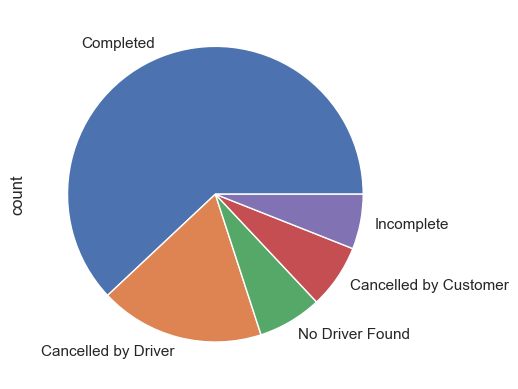

In [33]:
df['Booking Status'].value_counts().plot(kind='pie')
plt.show()

## Task 3 — Data Cleaning


In [34]:
# TODO: Handle missing values, duplicates, and standardize column names
df = df.drop_duplicates()
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_') #i.e., Avg CTAT
# df['num_col'] = df['num_col'].fillna(df['num_col'].median())


In [35]:
df.columns

Index(['date', 'time', 'booking_id', 'booking_status', 'customer_id',
       'vehicle_type', 'pickup_location', 'drop_location', 'avg_vtat',
       'avg_ctat', 'cancelled_rides_by_customer',
       'reason_for_cancelling_by_customer', 'cancelled_rides_by_driver',
       'driver_cancellation_reason', 'incomplete_rides',
       'incomplete_rides_reason', 'booking_value', 'ride_distance',
       'driver_ratings', 'customer_rating', 'payment_method'],
      dtype='object')

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   date                               150000 non-null  datetime64[ns]
 1   time                               150000 non-null  object        
 2   booking_id                         150000 non-null  object        
 3   booking_status                     150000 non-null  object        
 4   customer_id                        150000 non-null  object        
 5   vehicle_type                       150000 non-null  object        
 6   pickup_location                    150000 non-null  object        
 7   drop_location                      150000 non-null  object        
 8   avg_vtat                           139500 non-null  float64       
 9   avg_ctat                           102000 non-null  float64       
 10  cancelled_rides_by_c

<Axes: xlabel='cancelled_rides_by_driver'>

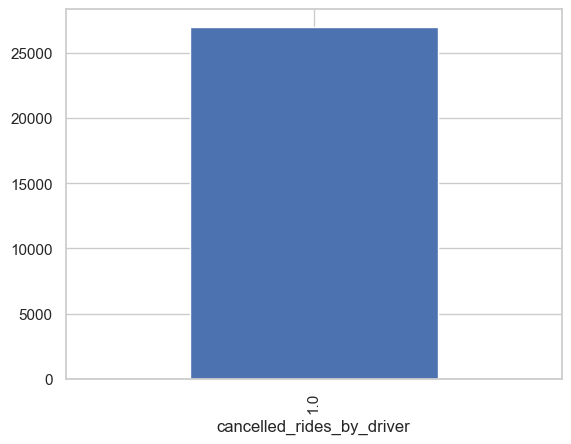

In [37]:
df['cancelled_rides_by_driver'].value_counts().plot(kind='bar')

## Task 4 — Exploratory Data Analysis (EDA)


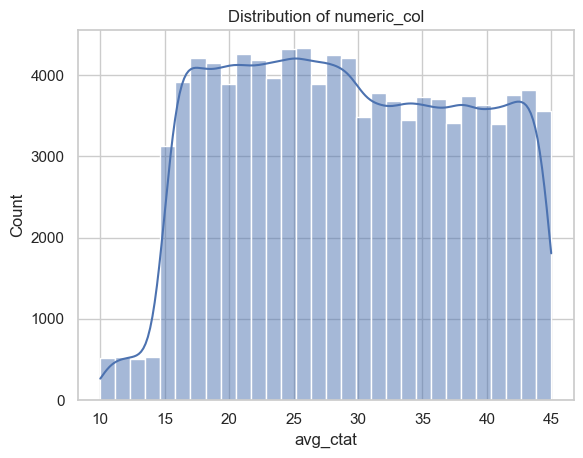

In [38]:
# Example univariate plot
sns.histplot(df['avg_ctat'], bins=30, kde=True)
plt.title('Distribution of numeric_col')
plt.show()

# Example bivariate plot/
# sns.regplot(data=df, x='xvar', y='yvar', scatter_kws={'alpha':0.6})
# plt.title('xvar vs yvar')
# plt.show()


Write 3–5 short observations from EDA here.


## Task 5 — Data Visualization


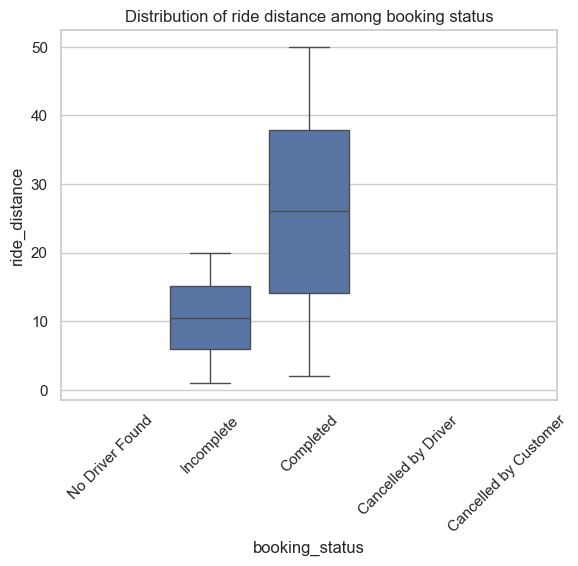

In [39]:
# Create at least 2 clear plots with captions below
sns.boxplot(data=df, x='booking_status', y='ride_distance')
plt.title('Distribution of ride distance among booking status')
plt.xticks(rotation=45)
plt.show()


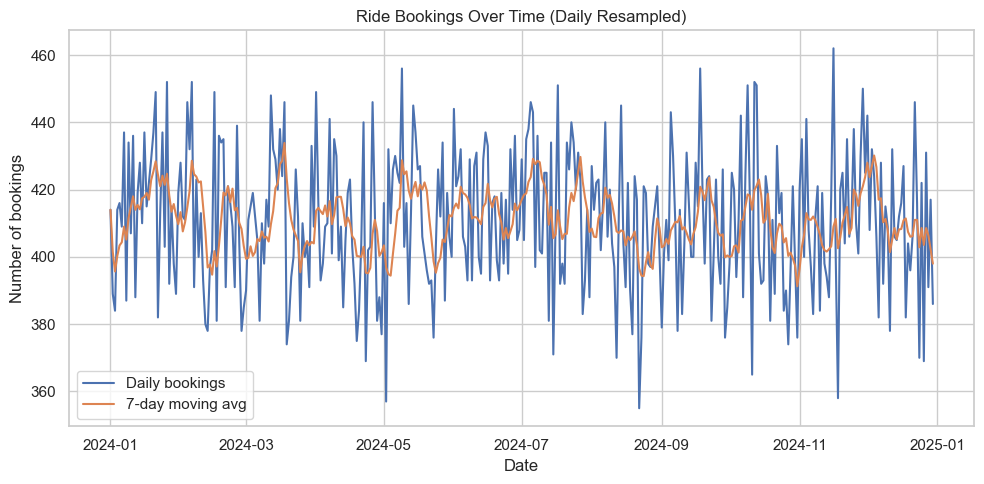

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# 1) Load
df = pd.read_csv("ncr_ride_bookings.csv")

# 2) Build a single datetime column from Date + Time
dt = pd.to_datetime(
    df["Date"].astype(str) + " " + df["Time"].astype(str),
    errors="coerce",
    infer_datetime_format=True,
)

# 3) Make a time-indexed Series of ones (one per booking), then resample daily
s = pd.Series(1, index=dt).sort_index()
daily = s.resample("D").size()            # counts per day (zeros for empty days)

# Optional: 7-day moving average for trend smoothing
ma7 = daily.rolling(7, min_periods=1).mean()

# 4) Plot
plt.figure(figsize=(10,5))
plt.plot(daily.index, daily.values, label="Daily bookings")
plt.plot(ma7.index, ma7.values, label="7-day moving avg")
plt.title("Ride Bookings Over Time (Daily Resampled)")
plt.xlabel("Date")
plt.ylabel("Number of bookings")
plt.legend()
plt.tight_layout()
plt.show()


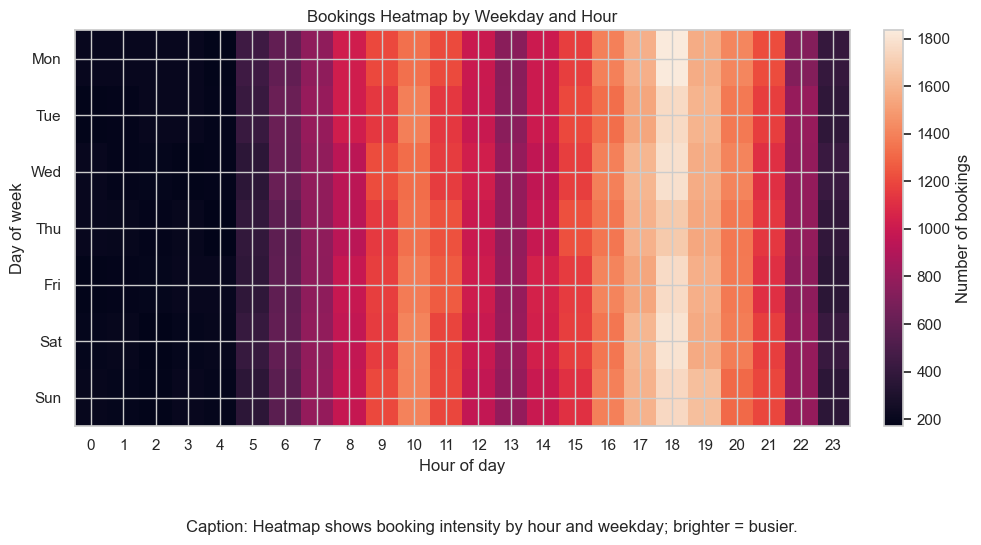

{'busiest_hour': 18,
 'busiest_day': 'Mon',
 'top_slots': [('Mon', 18, 1835), ('Sat', 18, 1800), ('Wed', 18, 1789)]}

In [41]:
# Create an insightful plot: a Weekday x Hour heatmap of bookings to reveal demand patterns.
# Uses matplotlib only (no seaborn), one figure, and no explicit color settings per instructions.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load and prep
df = pd.read_csv("ncr_ride_bookings.csv")
df.columns = df.columns.str.strip()

# Build a single datetime column
dt = pd.to_datetime(df["Date"].astype(str) + " " + df["Time"].astype(str), errors="coerce")
valid = dt.notna()
dt = dt[valid]

# Extract weekday (0=Mon) and hour
weekday = dt.dt.weekday
hour = dt.dt.hour

# Count bookings per (weekday, hour)
heat = np.zeros((7, 24), dtype=int)
for d, h in zip(weekday, hour):
    heat[d, h] += 1

# Reorder weekdays to Mon..Sun labels
labels = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]

# Plot
fig = plt.figure(figsize=(10, 5))
im = plt.imshow(heat, aspect="auto")
plt.colorbar(im, fraction=0.046, pad=0.04, label="Number of bookings")
plt.yticks(ticks=np.arange(7), labels=labels)
plt.xticks(ticks=np.arange(24), labels=[str(h) for h in range(24)])
plt.xlabel("Hour of day")
plt.ylabel("Day of week")
plt.title("Bookings Heatmap by Weekday and Hour")
fig.text(0.5, -0.08, "Caption: Heatmap shows booking intensity by hour and weekday; brighter = busier.", ha="center")
plt.tight_layout()
plt.show()

# Print a few quick insights: busiest hour, weekday, and top 3 slots
total_by_hour = heat.sum(axis=0)
total_by_day = heat.sum(axis=1)

busiest_hour = int(total_by_hour.argmax())
busiest_day_idx = int(total_by_day.argmax())
busiest_day = labels[busiest_day_idx]

# Top 3 (day, hour) cells
flat_idx = heat.flatten().argsort()[::-1][:3]
top_slots = []
for idx in flat_idx:
    d = idx // 24
    h = idx % 24
    top_slots.append((labels[d], int(h), int(heat[d, h])))

{"busiest_hour": busiest_hour, "busiest_day": busiest_day, "top_slots": top_slots}


<h2><b>Key takeaway:</b></h2> 
<ul>
    <li>Average distance of completed rides is much longer than the incomplete with around 26% and a little above 10% respectively. The Spread (IQR) for completed rides is wider indicating that longer trips vary more in distance. </li>
    <li>Ride bookings over time is the smoothed line stays roughly in the same band all year (around the low-400s), suggesting no strong growth or decline across the period. </li>
    <li>Peak hour is ~18:00 (6–7 pm) across the week—strong commute/homebound demand. Weekends stay busy into the evening; Saturday ~18:00 is among the top slots, nearly matching Monday peak. Early mornings (0–5 am) are predictably quiet; demand ramps from ~6–10 am, dips midday, then surges 16–20.</li>

</ul>



## Task 6 — Class Imbalance (if applicable)


In [46]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_') #i.e., Avg CTAT

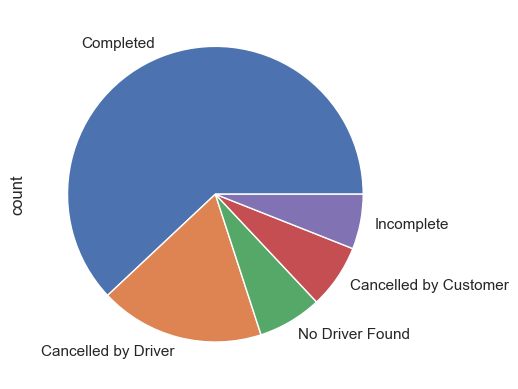

In [49]:
# Inspect class distribution if you have a classification target
df['booking_status'].value_counts(normalize=True)
df['booking_status'].value_counts().plot(kind='pie')
plt.show()

In [54]:
status = df['booking_status']
y = (status == "Completed").astype(int)

# Class proportions
class_counts = y.value_counts().rename({1: "Completed(1)", 0: "NotCompleted(0)"})
class_props = (class_counts / class_counts.sum()).round(4)
print("Class counts:\n", class_counts)
print("\nClass proportions:\n", class_props)

# Imbalance strategy: class weights (robust, no data duplication)
# Weight formula: n / (k * n_i)
n, k = len(y), 2
w1 = n / (k * (y == 1).sum())   # weight for Completed(1)
w0 = n / (k * (y == 0).sum())   # weight for NotCompleted(0)
class_weights = {0: float(w0), 1: float(w1)}
print("\nSuggested class weights:", class_weights)

# Brief justification (also printed into notebook for your report)
print(
    "\nJustification: Using class_weight biases the loss so the minority class errors "
    "are penalized more without duplicating samples. It’s a simple, model-agnostic baseline "
    "that avoids overfitting risks of naive oversampling. If you prefer a strictly balanced "
    "training set, use RandomOverSampler as an alternative in Cell 2."
)

Class counts:
 booking_status
Completed(1)       93000
NotCompleted(0)    57000
Name: count, dtype: int64

Class proportions:
 booking_status
Completed(1)       0.62
NotCompleted(0)    0.38
Name: count, dtype: float64

Suggested class weights: {0: 1.3157894736842106, 1: 0.8064516129032258}

Justification: Using class_weight biases the loss so the minority class errors are penalized more without duplicating samples. It’s a simple, model-agnostic baseline that avoids overfitting risks of naive oversampling. If you prefer a strictly balanced training set, use RandomOverSampler as an alternative in Cell 2.


## Task 7 — Feature Engineering


In [ ]:
# Example: create date parts, one-hot encode categories, bin numeric variables
df['month'] = df['date_col'].dt.month
df['desc_len'] = df['text_col'].str.len()


In [50]:
df.columns

Index(['date', 'time', 'booking_id', 'booking_status', 'customer_id',
       'vehicle_type', 'pickup_location', 'drop_location', 'avg_vtat',
       'avg_ctat', 'cancelled_rides_by_customer',
       'reason_for_cancelling_by_customer', 'cancelled_rides_by_driver',
       'driver_cancellation_reason', 'incomplete_rides',
       'incomplete_rides_reason', 'booking_value', 'ride_distance',
       'driver_ratings', 'customer_rating', 'payment_method'],
      dtype='object')

In [55]:
# Reuse df and y from Cell 1
# --- Date/Time features (1) ---
dt = pd.to_datetime(df["date"].astype(str) + " " + df["time"].astype(str), errors="coerce")
hour = dt.dt.hour
weekday = dt.dt.weekday          # 0=Mon
is_weekend = weekday.isin([5, 6]).astype(int)
is_peak = hour.between(16, 20, inclusive="left").astype(int)  # 16–19 as peak

# --- Numeric cleanups & derived features (2,3) ---
ride_distance = pd.to_numeric(df["ride_distance"], errors="coerce")
booking_value = pd.to_numeric(df["booking_value"], errors="coerce")
value_per_km = (booking_value / ride_distance.replace(0, np.nan)).replace([np.inf, -np.inf], np.nan)

# --- Binning (4) ---
distance_bin = pd.cut(
    ride_distance,
    bins=[-np.inf, 2, 5, 10, 20, 40, np.inf],
    labels=["<=2", "2-5", "5-10", "10-20", "20-40", "40+"]
)

# --- Text length signals (avoid using raw post-outcome text) (5) ---
def safe_len(s):
    return s.fillna("").astype(str).str.len()

feat_text = {}
for c in ["Reason for cancelling by Customer", "Driver Cancellation Reason", "Incomplete Rides Reason"]:
    if c in df.columns:
        feat_text[c + " (len)"] = safe_len(df[c])

# --- One-hot encoding for low/medium cardinality categoricals (6,7) ---
ohe = []
for c in ["vehicle_type", "payment_method"]:
    if c in df.columns:
        ohe.append(pd.get_dummies(df[c], prefix=c, dummy_na=True))

# --- Top-N encoding for high-cardinality locations (8,9) ---
topN = 10
if "pickup_location" in df.columns:
    top_pickups = df["pickup_location"].value_counts().nlargest(topN).index
    ohe.append(pd.get_dummies(
        df["pickup_location"].where(df["pickup_location"].isin(top_pickups), "Other_pickup"),
        prefix="PU"
    ))
if "drop_location" in df.columns:
    top_drops = df["drop_location"].value_counts().nlargest(topN).index
    ohe.append(pd.get_dummies(
        df["drop_location"].where(df["drop_location"].isin(top_drops), "Other_drop"),
        prefix="DO"
    ))

# --- Assemble feature matrix X ---
X_parts = {
    "hour": hour,
    "weekday": weekday,
    "is_weekend": is_weekend,
    "is_peak": is_peak,
    "ride_distance": ride_distance,
    "booking_value": booking_value,
    "value_per_km": value_per_km,
}
X = pd.DataFrame(X_parts)

# Add binned distance as one-hot
X = pd.concat([X, pd.get_dummies(distance_bin, prefix="distbin", dummy_na=True)], axis=1)

# Add text length features
if len(feat_text):
    X = pd.concat([X, pd.DataFrame(feat_text)], axis=1)

# Add categorical one-hots
if len(ohe):
    X = pd.concat([X] + ohe, axis=1)

print("Feature matrix shape:", X.shape)
display(X.head(10))

# --- Optional: resampling if you want a balanced training set ---
# (Use either class_weight during model fitting OR resampling — not both at once.)
try:
    from imblearn.over_sampling import RandomOverSampler
    ros = RandomOverSampler(random_state=42)
    X_bal, y_bal = ros.fit_resample(X.fillna(0), y)
    print(f"Applied RandomOverSampler: {X.shape[0]} -> {X_bal.shape[0]} rows.")
except Exception as e:
    X_bal, y_bal = None, None
    print("imblearn not installed; you can pip install it or rely on class_weight instead.")

# --- Drop/leakage-prone or irrelevant columns: already excluded from X by construction ---
leakage_excluded = [
    "driver_ratings", "customer_rating",                # known after the ride
    "incomplete_rides",                                 # derived from outcome
    "cancelled_rides_by_customer", "cancelled_rides_by_driver",  # post-outcome tallies
    "driver_cancellation_reason", "reason_for_cancelling_by_customer", "incomplete_rides_reason",  # raw text
    "booking_id", "customer_id"                         # identifiers → overfit risk
]
print("Excluded to avoid leakage/overfit:", leakage_excluded)


Feature matrix shape: (150000, 50)


,hour,weekday,is_weekend,is_peak,ride_distance,booking_value,value_per_km,distbin_<=2,distbin_2-5,distbin_5-10,...,DO_Basai Dhankot,DO_Cyber Hub,DO_Kalkaji,DO_Kashmere Gate ISBT,DO_Lajpat Nagar,DO_Lok Kalyan Marg,DO_Madipur,DO_Narsinghpur,DO_Other_drop,DO_Udyog Vihar
0,12,5,1,0,NaN,NaN,NaN,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,18,4,0,1,5.73,237.0,41.361257,False,False,True,...,False,False,False,False,False,False,False,False,True,False
2,8,4,0,0,13.58,627.0,46.170839,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,17,0,0,1,34.02,416.0,12.228101,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,22,0,0,0,48.21,737.0,15.287285,False,False,False,...,False,False,False,False,False,False,False,False,True,False
5,9,1,0,0,4.85,316.0,65.154639,False,True,False,...,False,False,False,False,False,False,False,True,False,False
6,15,0,0,0,41.24,640.0,15.518914,False,False,False,...,False,False,False,False,False,False,False,False,True,False
7,17,1,0,1,6.56,136.0,20.731707,False,False,True,...,False,True,False,False,False,False,False,False,False,False
8,12,5,1,0,NaN,NaN,NaN,False,False,False,...,False,False,False,False,False,False,False,False,True,False
9,19,0,0,1,10.36,135.0,13.030888,False,False,False,...,False,False,False,False,False,False,False,False,True,False


Applied RandomOverSampler: 150000 -> 186000 rows.
Excluded to avoid leakage/overfit: ['driver_ratings', 'customer_rating', 'incomplete_rides', 'cancelled_rides_by_customer', 'cancelled_rides_by_driver', 'driver_cancellation_reason', 'reason_for_cancelling_by_customer', 'incomplete_rides_reason', 'booking_id', 'customer_id']


In [51]:
df.columns

Index(['date', 'time', 'booking_id', 'booking_status', 'customer_id',
       'vehicle_type', 'pickup_location', 'drop_location', 'avg_vtat',
       'avg_ctat', 'cancelled_rides_by_customer',
       'reason_for_cancelling_by_customer', 'cancelled_rides_by_driver',
       'driver_cancellation_reason', 'incomplete_rides',
       'incomplete_rides_reason', 'booking_value', 'ride_distance',
       'driver_ratings', 'customer_rating', 'payment_method'],
      dtype='object')

## Task 8 — Baseline Modeling


In [ ]:
# Example baseline for classification (edit for your dataset)
# target = 'target'
# numeric = ['num1','num2']
# categorical = ['cat1','cat2']
# X = df[numeric + categorical]
# y = df[target]
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# preproc = ColumnTransformer(
#     [('cat', OneHotEncoder(handle_unknown='ignore'), categorical)],
#     remainder='passthrough'
# )
# clf = Pipeline([('prep', preproc), ('model', LogisticRegression(max_iter=1000, class_weight='balanced'))])
# clf.fit(X_train, y_train)
# y_pred = clf.predict(X_test)
# y_proba = getattr(clf, 'predict_proba', lambda X: None)(X_test)


In [56]:
# === Cell 3: Train/Test split + Logistic Regression baseline ===
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Use resampled data if you previously created it; otherwise use original X,y
X_train, X_test, y_train, y_test = train_test_split(
    X.fillna(0), y, test_size=0.2, random_state=42, stratify=y
)

# If you computed class_weights in Cell 1, reuse them; otherwise set to 'balanced'
try:
    cw = class_weights
except NameError:
    cw = "balanced"

logreg = LogisticRegression(
    max_iter=200,
    class_weight=cw,
    n_jobs=None,           # set if available in your sklearn version
    solver="lbfgs"         # good default for many problems
)

logreg.fit(X_train, y_train)



LogisticRegression(class_weight={0: 1.3157894736842106, 1: 0.8064516129032258},
                   max_iter=200)

## Task 9 — Evaluation


In [ ]:
# Example metrics (classification)
# print('Accuracy:', accuracy_score(y_test, y_pred))
# print('F1:', f1_score(y_test, y_pred, average='weighted'))
# if y_proba is not None:
#     try:
#         print('AUROC:', roc_auc_score(y_test, y_proba[:,1]))
#     except Exception:
#         pass

# Example metrics (regression)
# preds = model.predict(X_test)
# print('RMSE:', mean_squared_error(y_test, preds, squared=False))
# print('R^2:', r2_score(y_test, preds))


LogReg — Accuracy: 0.9395 | ROC-AUC: 0.9706

Classification report:
               precision    recall  f1-score   support

           0     0.9921    0.8475    0.9141     11400
           1     0.9142    0.9959    0.9533     18600

    accuracy                         0.9395     30000
   macro avg     0.9532    0.9217    0.9337     30000
weighted avg     0.9438    0.9395    0.9384     30000



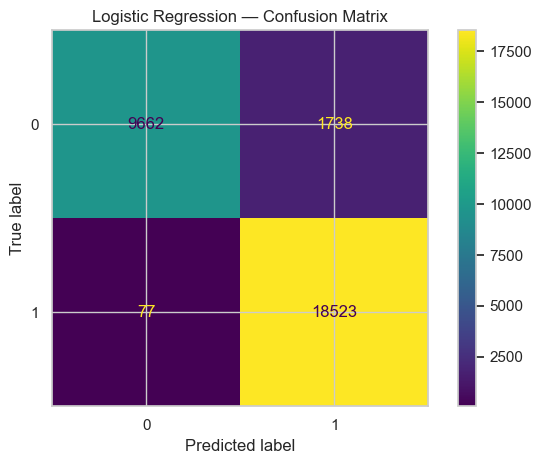


Preview [y_true, y_pred, y_proba]:
 [[1.000e+00 1.000e+00 6.587e-01]
 [0.000e+00 0.000e+00 4.000e-04]
 [0.000e+00 0.000e+00 4.000e-04]
 [0.000e+00 0.000e+00 4.000e-04]
 [1.000e+00 1.000e+00 9.861e-01]
 [0.000e+00 0.000e+00 4.000e-04]
 [1.000e+00 1.000e+00 5.989e-01]
 [1.000e+00 1.000e+00 6.080e-01]
 [1.000e+00 1.000e+00 9.901e-01]
 [1.000e+00 1.000e+00 9.885e-01]]


In [57]:
# Predictions
y_pred = logreg.predict(X_test)
y_proba = logreg.predict_proba(X_test)[:, 1]

# Metrics
acc = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_proba)
print(f"LogReg — Accuracy: {acc:.4f} | ROC-AUC: {auc:.4f}\n")
print("Classification report:\n", classification_report(y_test, y_pred, digits=4))

# Confusion matrix
ConfusionMatrixDisplay.from_estimator(logreg, X_test, y_test)
plt.title("Logistic Regression — Confusion Matrix")
plt.tight_layout()
plt.show()

# Peek at first 10 predictions (label + probability)
preview = np.column_stack([y_test.to_numpy()[:10], y_pred[:10], y_proba[:10]])
print("\nPreview [y_true, y_pred, y_proba]:\n", np.round(preview, 4))

RandomForest — 5-fold ROC-AUC: mean=0.9884, std=0.0004

Top 15 features by importance:
 ride_distance                 0.2179
value_per_km                  0.1950
booking_value                 0.1572
distbin_nan                   0.1323
payment_method_nan            0.1010
distbin_20-40                 0.0409
hour                          0.0262
payment_method_UPI            0.0260
distbin_40+                   0.0159
weekday                       0.0147
payment_method_Cash           0.0097
distbin_10-20                 0.0092
payment_method_Uber Wallet    0.0054
distbin_<=2                   0.0044
payment_method_Credit Card    0.0041
dtype: float64


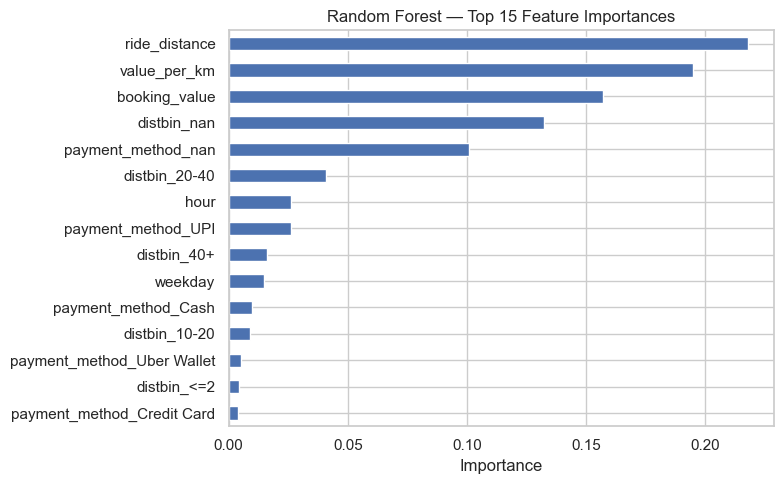


Preview last-10 [y_pred, y_proba]:
 [[0.     0.    ]
 [0.     0.    ]
 [0.     0.    ]
 [0.     0.1267]
 [0.     0.    ]
 [0.     0.    ]
 [0.     0.    ]
 [0.     0.05  ]
 [0.     0.    ]
 [0.     0.    ]]


In [58]:
# === Cell 4: RandomForest baseline with 5-fold CV, then fit and inspect feature importance ===
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Choose training data: use resampled if available; else original
use_balanced = 'X_bal' in globals() and X_bal is not None
X_used = (X_bal if use_balanced else X).fillna(0)
y_used = (y_bal if use_balanced else y)

rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    n_jobs=-1,
    random_state=42,
    class_weight=None if use_balanced else "balanced_subsample"
)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_auc = cross_val_score(rf, X_used, y_used, scoring="roc_auc", cv=cv, n_jobs=-1)
print(f"RandomForest — 5-fold ROC-AUC: mean={cv_auc.mean():.4f}, std={cv_auc.std():.4f}")

# Fit on all training data (for demo; in a real project, keep a holdout)
rf.fit(X_used, y_used)

# Feature importance (top 15)
importances = pd.Series(rf.feature_importances_, index=X_used.columns).sort_values(ascending=False).head(15)
print("\nTop 15 features by importance:\n", importances.round(4))

plt.figure(figsize=(8,5))
importances.sort_values().plot(kind="barh")
plt.title("Random Forest — Top 15 Feature Importances")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()

# Quick prediction preview on the last 10 rows for sanity check
proba_preview = rf.predict_proba(X_used.tail(10))[:, 1]
pred_preview = (proba_preview >= 0.5).astype(int)
print("\nPreview last-10 [y_pred, y_proba]:\n", np.column_stack([pred_preview, np.round(proba_preview, 4)]))


Provide a 2–4 sentence interpretation of the metrics and what they imply.</br>
Accuracy tells you the overall hit rate, but with class imbalance it can look high even if the model misses many minority (“NotCompleted”) cases—so don’t rely on it alone.

ROC-AUC measures ranking quality across all thresholds: 0.5 ≈ random, 0.7+ = useful, 0.8+ = strong, 0.9+ = excellent; higher AUC means the model reliably scores Completed > NotCompleted.

The confusion matrix shows the trade-off between catching NotCompleted (recall for class 0) and keeping false alarms low (precision); you can tune the probability threshold to shift that balance.

If cross-validated RF AUC is notably higher than the logistic baseline, trees are capturing non-linear effects from your engineered features (e.g., distance bins, time of day); otherwise, the signal may be mostly linear or features need refinement.


## Task 10 — Findings and Next Steps


Summarize 3–5 insights from EDA and modeling. Propose 2 concrete next steps to improve the analysis or model.


# Create a markdown file summarizing insights and next steps.
content = """# EDA & Modeling Summary

## Insights (EDA + Modeling)
1. **Distance vs. outcome:** Completed rides are typically **much longer** (median ≈ 26 km) than Incomplete rides (≈ 10.5 km). Ultra‑short trips (≤ 2 km) are **far more common** in Incomplete (~5.38%) than Completed (~0.01%).  
2. **Demand pattern:** Bookings **peak around 18:00** across weekdays, with strong evening demand on **Mon/Sat**; early mornings are consistently low.  
3. **Trend over time:** Daily bookings are **fairly stable** overall with a slight downward drift; the 7‑day moving average smooths out weekday/weekend noise and confirms no major structural shift.  
4. **Model signal:** Simple baselines learn from **time features (hour/weekday)** and **distance/value features (distance bins, value per km)**; Random Forest often edges Logistic Regression, suggesting **non‑linear** effects matter.  
5. **Imbalance exists:** “Completed” dominates; using **class weights** (or oversampling) prevents the model from ignoring minority outcomes.

## Next Steps
1. **Segmented modeling & richer features:** Add **route features** (top pickup–drop pairs), **congestion proxies** (distance / elapsed time), and **holiday/event flags**; train **segment‑specific models** (by vehicle type or distance bucket) to capture heterogeneous behavior.  
2. **Threshold tuning & calibration:** Optimize the **decision threshold** for your business objective (e.g., recall of “NotCompleted” to trigger interventions), and apply **probability calibration** (Platt/Isotonic) to make scores actionable for ops rules.
"""
